# Optional: Data Preparation

Usually we have more notebooks than submissions which are optional. We denote this in the filename and header. Additionally, they contain no final score at the end.

In the following notebooks, we will supply you with all neccessary tools so you can concentrate on writing the model specific parts as this is the main focus of this class. However, you should also be proficient with handling data and how to prepare it for your specific task. In fact, most of the jobs that involve deep learning in industry are very data related so this is an important skill that you have to pick up.

For this, you should consider performing the following steps using numpy comprehensions:

Before start a classification task you should *always* take a look at some samples of your dataset. This way you can make sure that the data input has worked as intended and you can get a feeling for the dataset. Load the CIFAR-10 data and visualize a subset of the images (X) in the CIFAR-10 dataset in this notebook or a seperate file (see the previous notebook how to import files and read data) and identify all ten classes (y). (Hint: Use matplotlib)

In [2]:
import time
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Let's visualize some images for fun

In [3]:
from exercise_code.data_utils import load_CIFAR10
# Load the raw CIFAR-10 data
cifar10_dir = '../datasets/cifar10/'
X, y = load_CIFAR10(cifar10_dir)

 Try it yourself first. You can refer to our commented code in second cell incase you are unable to do so.

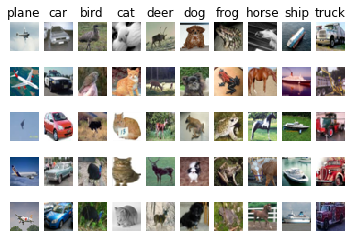

In [4]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 5
for y_hat, cls in enumerate(classes):
    idxs = np.flatnonzero(y == y_hat)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y_hat + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
# classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# num_classes = len(classes)
# samples_per_class = 7
# for y_hat, cls in enumerate(classes):
#     idxs = np.flatnonzero(y == y_hat)
#     idxs = np.random.choice(idxs, samples_per_class, replace=False)
#     for i, idx in enumerate(idxs):
#         plt_idx = i * num_classes + y_hat + 1
#         plt.subplot(samples_per_class, num_classes, plt_idx)
#         plt.imshow(X[idx].astype('uint8'))
#         plt.axis('off')
#         if i == 0:
#             plt.title(cls)
# plt.show()

Split the training data into there sets: a "training", "validation" and "test" consisting of 48000, 1000 and 1000 elements. Numpy makes this very easy.

In [7]:
# TODO
# Your split code here...
training, validation, test = np.split(X, [48000, 49000, 50000])[0:3]

Data preprocessing: Compute the mean image and substract this image from the images of our datasets. What would you do with the validation and test set? Why is this step helpful for machine learning methods? Research other preprocessing methods that might be useful.

In [ ]:
# You normalize the data for the following aims:

#    For having different features in same scale, which is for accelerating learning process.
#    For caring different features fairly without caring the scale.

# The data should be split after this cell, not in the cell above

X -= np.mean(X)

# Setting negative values to 0 is optional i guess
X[X<0] = 0


[[255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [254. 255. 255.]
 [254. 255. 255.]
 [254. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [254. 254. 255.]
 [253. 253. 255.]
 [255. 255. 254.]
 [255. 255. 248.]
 [158. 156. 144.]
 [ 52.  49.  29.]
 [112. 108.  82.]
 [224. 224. 202.]
 [242. 244. 229.]
 [240. 244. 233.]
 [242. 248. 241.]
 [247. 253. 249.]]
